# Austin Animal Shelter Analysis
- By Adam Harris

## Imports

In [1]:
# import data manipulation libraries
import numpy as np
import pandas as pd
# import data acquisition and preparation functions
import wrangle_austin_shelter as w
# import exploration visualizations
import explore_austin_shelter as e
# import machine learning models
import model_austin_shelter as m

## Acquire

* Data was acquired from https://data.austintexas.gov/resource/wter-evkm (intake data) and https://data.austintexas.gov/resource/9t4d-g238 (outcome data)
* Data was acquired via api and cached locally
* The data was downloaded on 4-27-2023
* The original size of the dataset was 150532, 11 rows and columns of intakes, and 150495, 11 rows and columns of outcome data
* Each row represents one unique animal's intake or outcome from a trip to the Austin,TX Animal Shelter
* Each column describes one trait of the animal

## Prepare

* Intake and Outcome datasets were merged into one DataFrame
* Redundant columns from merging were removed
* Column names were changed to be easier to work with
* The data type for date columns was changed to datetime
* A new feature was created to identify if the animal has a name
* Similar outcome types were combined to be easier to work
* Categorical columns were encoded into integers/dummy variables
* Null values in the outcome_subtype column were filled with 'None'
* Rows with null values in the outcome_type were removed from the data, since they likely represent animals still at the shelter
* Data was split into train, validate and test (56%, 24%, 20%) groups to prevent overfiting

In [2]:
# Acquire and preapare dataset
animals, train, validate, test = w.wrangle_austin_animal_shelter()

reading intake data from local file
reading outcome data from local file


## Explore
We explored the following questions:

* What is the total percentage of animals that are adopted?
* Did the amount of animals euthenized at the shelter increase durring covid-19 years?
* What is the likelyhood that wildlife will leave the shelter?
* Are certain days busier than others for the animal shelter?
* Does an animal having a name affect the chances of them being adopted?
* Does an animal's sex have an affect on the adoption chance?

### Question - What is the total percentage of animals that adopted?

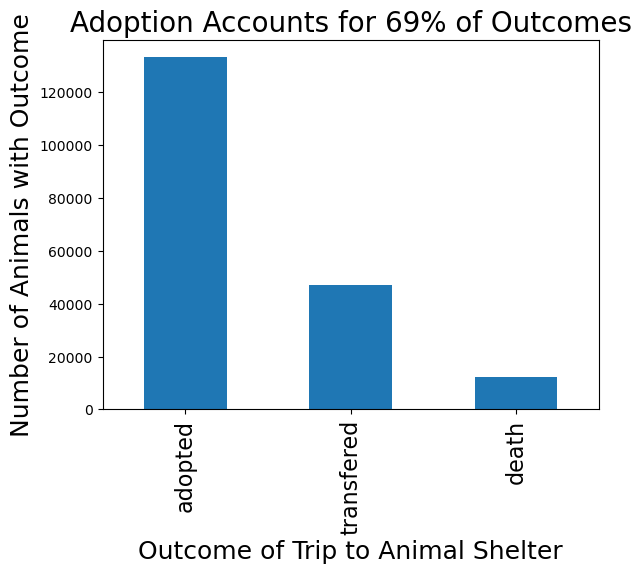

In [3]:
# show a plot of total animal outcomes from the shelter
e.get_plot_outcomes(animals)

#### Adoptions and returned to owner outcomes account for 69% of outcomes

### Question - Did the amount of animals euthenized at the shelter increase durring covid-19 years?

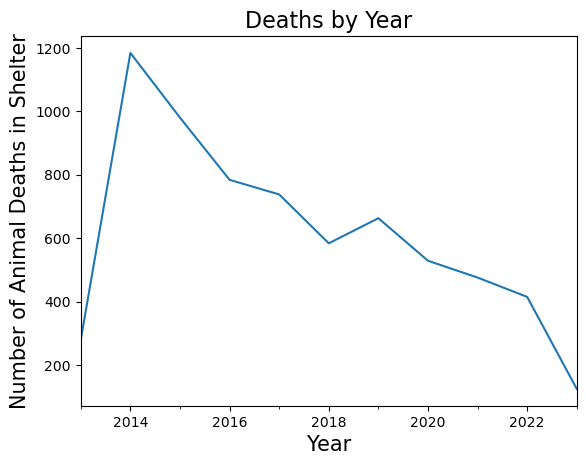

In [4]:
# display a plot of the number of deaths or disposal outcomes from the shelter since 2014
e.get_plot_deaths_by_year(train)

#### Animal deaths have actually decreased since 2014, with no clear jump due to covid-19

### Question - What is the likelyhood that wildlife will leave the shelter?

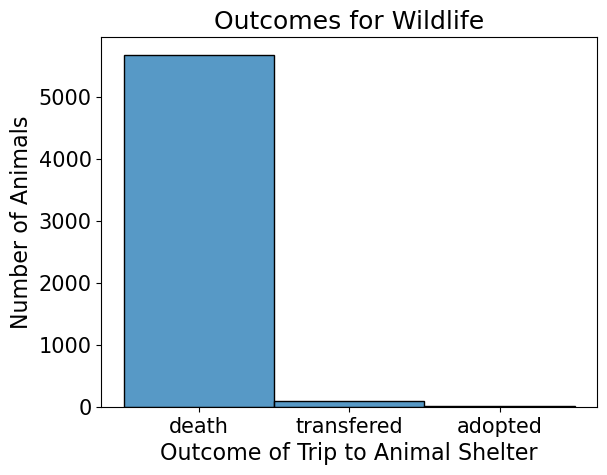

In [5]:
# display a plot of outcomes for animals with the intake_type 'Wildlife'
e.get_plot_wildlife_deaths(animals)

#### Looks like things don't turn out very well for wildlife that gets sent to the animal shelter, only 1.68 % survive a trip to the animal shelter

### Question - Are certain days busier than others for the animal shelter?

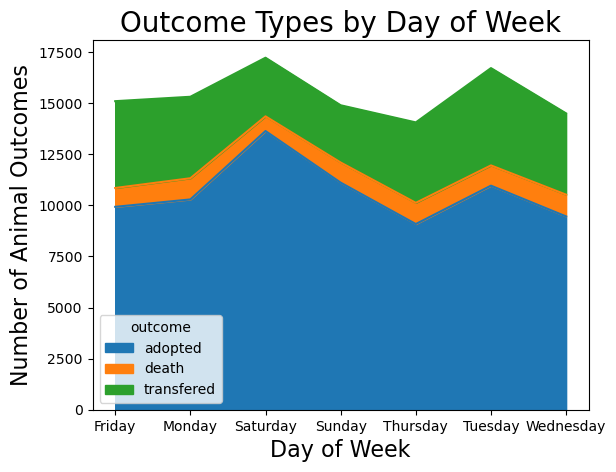

In [6]:
# Display a plot of outcome types by day of week
e.get_plot_outcomes_by_day(train)

#### Saturdays and Tuesdays appear to be busiest for outcomes

### Question - Does an animal having a name affect the chances of them being adopted?

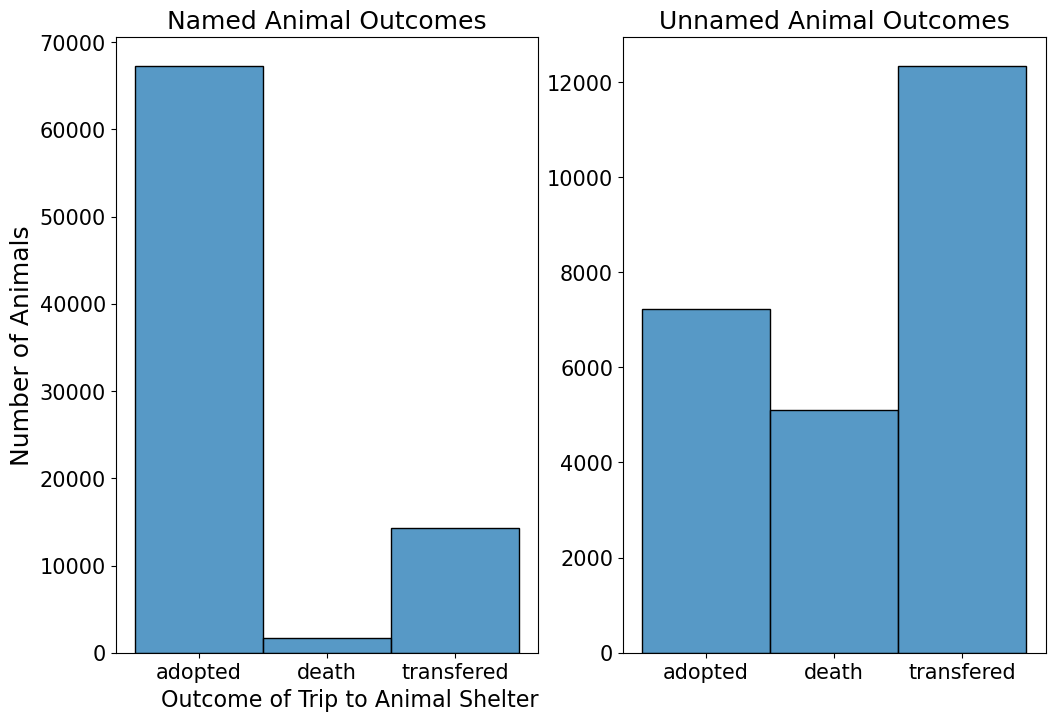

In [10]:
# Display two plots showing the difference in outcomes for named and unnamed animals
e.get_plot_named_vs_unnamed(train)

### Lets do a statistical test on named / outcome
- H$_0$: The outcome distributions are independent of if an animal has a name
- H$_a$: The outcome distributions is dependent on if an animal has a name
- α = 0.05
- This will be a categorical / categorical test, which will be a chi-squared test

In [11]:
# run a chi-squared test to check for independence between having a name and outcome type
e.check_chi2_hypothesis(train, 'has_name', 'outcome')

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that has_name and outcome are not independent.
The chi-squared coefficient between has_name and outcome is 26273.22 with a p-value of 0.0000
_______________________________________________________


#### We can conclude that having a name does have an effect on the outcome of the animal's trip to the animal shelter

### Question - Does an animal's sex have an affect on the adoption chance?

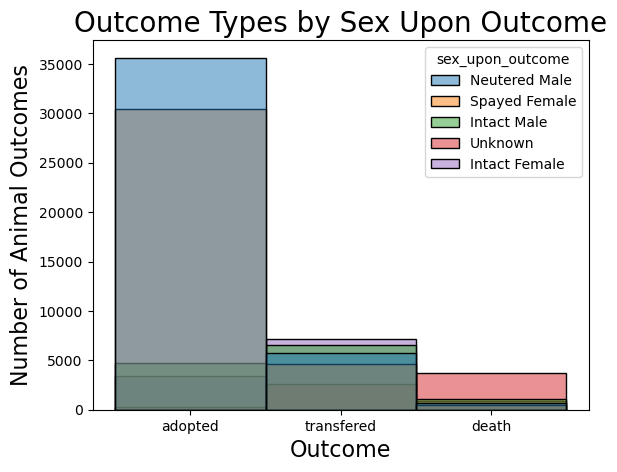

In [12]:
# display a plot showing the breakdown of sex_upon_outcome and outcome type
e.get_plot_outcomes_by_sex(train)

### Lets do a statistical test on animal sex upon outcome and outcome type
- H$_0$: The outcome distributions are independent of an animal's sex upon outcome
- H$_a$: The outcome distributions is dependent on the animal's sex upon outcome
- α = 0.05
- This will be a categorical / categorical test, which will be a chi-squared test

In [13]:
# run a statistical test to check if outcome is dependent on sex_upon_outcome
e.check_chi2_hypothesis(train, 'outcome', 'sex_upon_outcome_encoded')

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that outcome and sex_upon_outcome_encoded are not independent.
The chi-squared coefficient between outcome and sex_upon_outcome_encoded is 55708.44 with a p-value of 0.0000
_______________________________________________________


#### The animal's outcome type from their trip to the animal shelter is dependent on the animal's sex upon outcome

## Exploration Summary
Durring our exploration we found:
* 69% of animals are adopted or returned to their original owner
* The rate at which animals are euthenized has dropped steadily since 2014
* Wildlife does not have a good chance of surviving a trip to the animal shelter, with less than 2% leaving alive
* Tuesdays and Saturdays are the busiest days for animals leaving the shelter
* Having a name increases an animal's chance of being adopted
* Being spayed/neutered increases an animal's chance of being adopted

## Modeling

### Introduction
* In this project we attempted to classify if an animal will be adopted, therefore we used classification models for this problem
* For our assessment metrics we were looking to be overall correct in our predictions as much as possible, along with missing as few animals that have a low chance of being adopted
* We will be looking to maximize the accuracy and recall metrics
* Our baseline model (saying that an animal will be adopted) is accurate 69% of the time
* Our models used the features: has_name, sex_upon_outcome, intake_type, and animal_type

In [14]:
# assign the features to be used in the ML models
X_cols=['has_name', 'sex_upon_outcome_encoded', 
        'intake_type_encoded', 'animal_type_encoded']
y_col = 'adopted'

In [15]:
# create data subsets to be used in the ML models
train_X = train[X_cols]
train_y = train[y_col]
validate_X = validate[X_cols]
validate_y = validate[y_col]
test_X = test[X_cols]
test_y = test[y_col]

### Baseline Model

In [16]:
# get the accuracy metric for the baseline model (saying all animals will be adopted)
m.get_baseline(train, y_col)

The baseline prediction score accuracy is: 69.08%


### Best 3 Models
* Our best 3 models were Decision tree, Random forest and Logistic regression models
* Our best model was a random forest model

### Decision Tree Model

In [18]:
# get the decision tree model metrics
dt = m.get_decision_tree(train_X, validate_X, train_y, validate_y)

Decision Tree Model
Accuracy score on train: 84.91%
Accuracy score on validate: 85.27%
Recall score on train: 97.28%
Recall score on validate: 97.47%


### Random Forest Model

In [19]:
# get random forest model metrics
rf = m.get_random_forest(train_X, validate_X, train_y, validate_y)

Random Forest Model
Accuracy score on train: 84.96%
Accuracy score on validate: 85.30%
Recall score on train: 97.32%
Recall score on validate: 97.52%


### Logistic Regression Model

In [20]:
# get logistic regression model metrics
lr = m.get_logistic_regression(train_X, validate_X, train_y, validate_y)

Logistic Regression Model
Accuracy score on train: 76.40%
Accuracy score on validate: 76.79%
Recall score on train: 90.36%
Recall score on validate: 90.53%


### Test Model
* We chose to use the random forest model on our test data
* The random forest model had the best overall test metrics, along with the lowest drop in metrics between the training and validation datasets

In [21]:
# get random forest model used on the test data
m.get_rf_test(test_X, test_y, rf)

Random Forest Model
Accuracy score on test: 85.01%
Recall score on test: 97.17%


### Modeling Wrap 
* Our best model was a random forest model, with an accuracy score of around 85%, and recall score of 97%
* Our random forest model had a 16% better accuracy than the baseline model

## Conclusion

### Summary
* Having a name and being spayed/neutered are the leading factors towards adoption in the dataset
* The rate of euthanization at the Austin, TX animal shelter has dropped steadily since 2014
* Our model was able to achieve a 16% better accuracy than the baseline model and a 97% recall metric
* 16% represents over 24,000 individual animals that we are able to predict adoption outcome for better than our baseline model

### Recommendations
* We recommend giving animals a name if they don't have one
* Spay/Neuter should be standard practice, since it helps increase an animal's adoption chance and helps control the pet population
* It may be helpful to schedule more staff on Tuesdays and Saturdays since there are more animals going out on those days.

### Next Steps
* We would like to take more steps to clean the data, there were some duplicate values due to merging the datasets that we could do more with
* We would like to use the location data in the dataset to map out hotspots where strays are found
* It could also be good if we could get data about where animals are being transfered to
* We would like to get information about how the animals are shown to potential adopters with the intent of identifying media methods that are more sucessful in getting animals adopted.